### Data Cleaning

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", 500)

**Loading the dataset:**

In [66]:
dataset_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
financial_data = pd.read_csv(
    dataset_url, sep=" ", header=None, names=[f"atr{i}" for i in range(1, 22)]
)

**Checking the number of rows and columns:**

In [67]:
financial_data.shape

(1000, 21)

**First five row of the dataset:**

In [68]:
financial_data.head()

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,atr11,atr12,atr13,atr14,atr15,atr16,atr17,atr18,atr19,atr20,atr21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


**verifying the data types of the columns and if are any null values:**

In [69]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   atr1    1000 non-null   object
 1   atr2    1000 non-null   int64 
 2   atr3    1000 non-null   object
 3   atr4    1000 non-null   object
 4   atr5    1000 non-null   int64 
 5   atr6    1000 non-null   object
 6   atr7    1000 non-null   object
 7   atr8    1000 non-null   int64 
 8   atr9    1000 non-null   object
 9   atr10   1000 non-null   object
 10  atr11   1000 non-null   int64 
 11  atr12   1000 non-null   object
 12  atr13   1000 non-null   int64 
 13  atr14   1000 non-null   object
 14  atr15   1000 non-null   object
 15  atr16   1000 non-null   int64 
 16  atr17   1000 non-null   object
 17  atr18   1000 non-null   int64 
 18  atr19   1000 non-null   object
 19  atr20   1000 non-null   object
 20  atr21   1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


### Exploratory Data Analysis


**Substitute the attributes with its true meaning to help in the understanding of the EDA.**

In [70]:
# attribute 3 - Credit history
financial_data["credit_history"] = financial_data.atr3.map(
    {
        "A30": "no credits taken/ all credits paid back duly",
        "A31": "all credits at this bank paid back duly",
        "A32": "existing credits paid back duly till now",
        "A33": "delay in paying off in the past",
        "A34": "critical account/ other credits existing (not at this bank)",
    }
)

plt.show()

# attribute 4 - Purpose
financial_data["purpose"] = financial_data.atr4.map(
    {
        "A40": "car (new)",
        "A41": "car (used)",
        "A42": "furniture/equipment",
        "A43": "radio/television",
        "A44": "domestic appliances",
        "A45": "repairs",
        "A46": "education",
        "A47": "(vacation - does not exist?)",
        "A48": "retraining",
        "A49": "business",
        "A410": "others",
    }
)


# attribute 6 - savings account/bonds
financial_data["savings_account"] = financial_data.atr6.map(
    {
        "A61": "... < 100 DM",
        "A62": "100 <= ... < 500 DM",
        "A63": "500 <= ... < 1000 DM",
        "A64": ".. >= 1000 DM",
        "A65": "unknown/ no savings account",
    }
)

# attribute 13 - age  in years
financial_data["age"] = pd.cut(financial_data.atr13, 5)

# attribute 21 - Response variable
financial_data["response_variable"] = financial_data.atr21.map({1: "bad", 2: "good"})

**Distrribution of the response variable:**

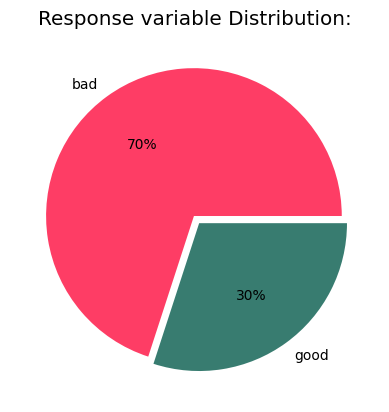

In [71]:
response_variable_count = financial_data.response_variable.value_counts()
plt.pie(
    x=response_variable_count,
    labels=response_variable_count.index,
    autopct="%1.0f%%",
    colors=["#fe3d65", "#387c70"],
    explode=[0.01, 0.05],
)
plt.title("Response variable Distribution:")
plt.show()

**Relationship between attributes and response variable**

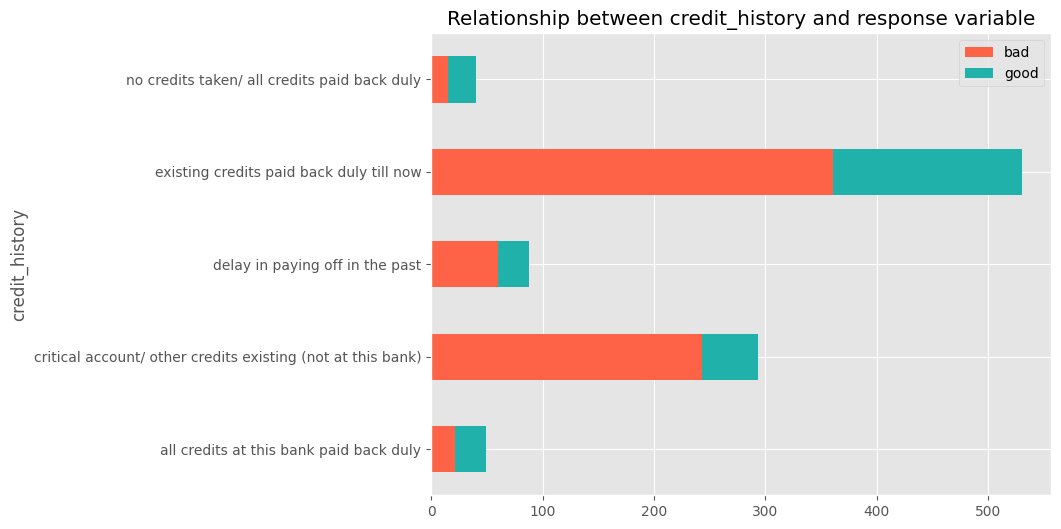

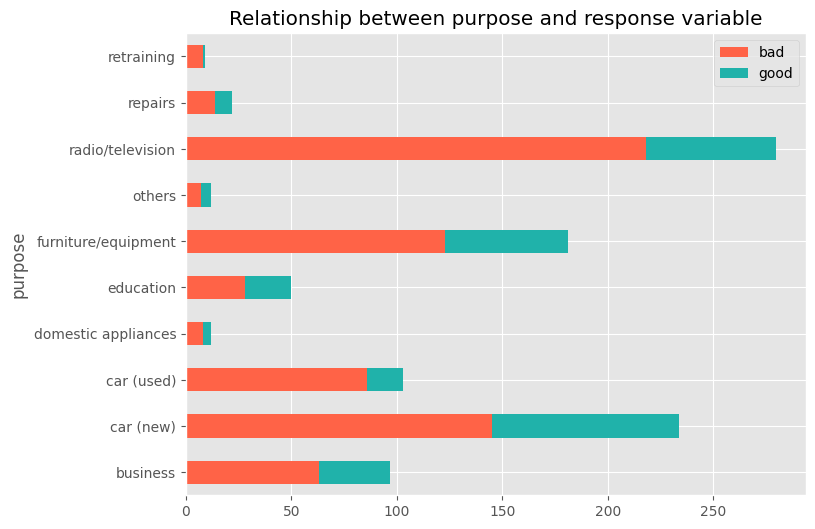

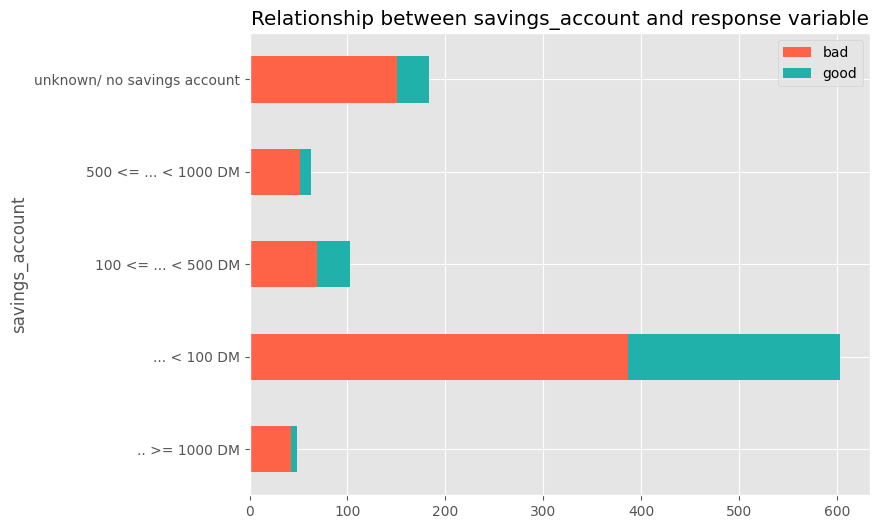

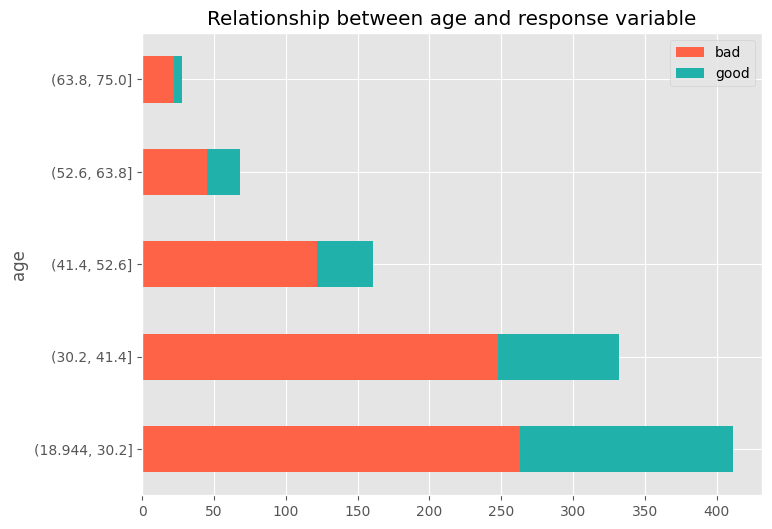

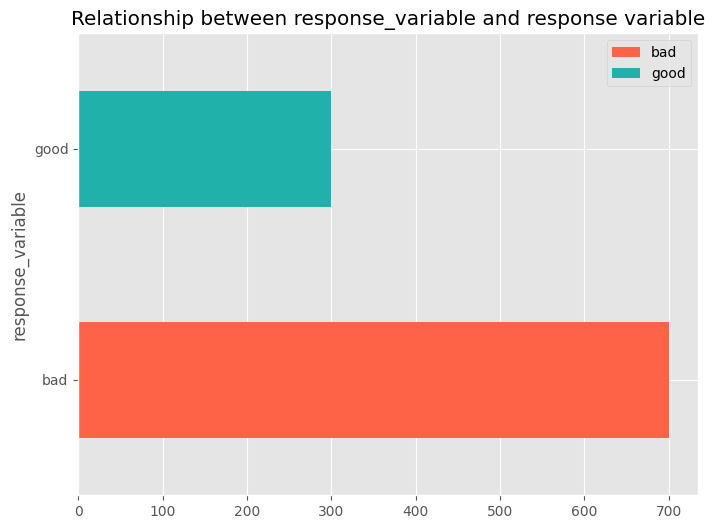

In [72]:
list_of_attributes = financial_data.columns[21:2]

for column in list_of_attributes:

    df_groupby_count = pd.DataFrame(financial_data.groupby([column, 'response_variable']).size()).copy()
    pivot_count = pd.pivot_table(data=df_groupby_count, index=column, columns='response_variable', values=0)

    pivot_count.plot.barh(stacked=True, color =['tomato', 'lightseagreen'], figsize=(8,6))

    plt.legend(["bad", "good"])
    plt.title(f"Relationship between {column} and response variable")

    plt.show()

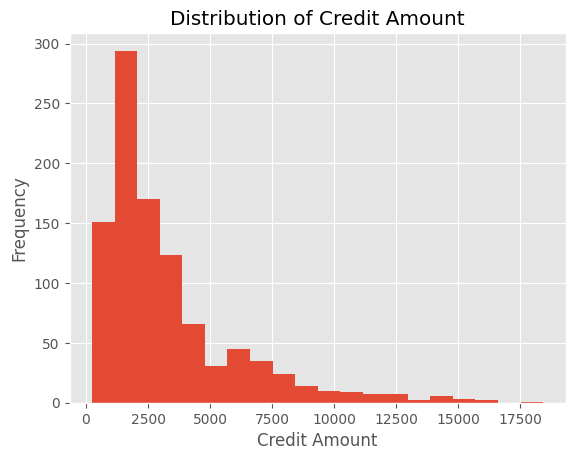

In [73]:
# Distribution of attribute 5 - Credit amount

plt.hist(financial_data["atr5"], bins=20)
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Amount")
plt.show()

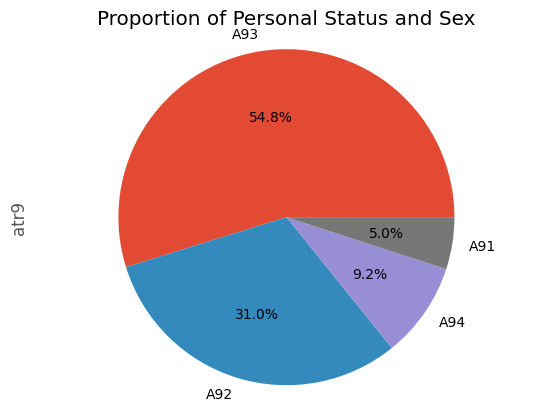

In [74]:
financial_data['atr9']\
    .value_counts()\
    .plot(
    kind='pie', 
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.title('Proportion of Personal Status and Sex')
plt.show()